# Example 6: Liquid crystal

Liquid crystals are usually made from elongated organic molecules which are birrefringent. Those molecules tend to arrange in the same direction, identified by a vector refered as director vector. Then, they form a birrefringent material. It is possible to fabricate container materials that determine the molecules arrangement direction on their surface. These surfaces are refered as director sheets. Then, if two oposite director sheets present diferent director angles, the molecules in the middle of the liquid crystal tend to arrange their director vector so it varies linearly between one sheet and the other.

<img src="Liquid_crystal.png" width=969 >

Image taken from "Bistable nematic liquid crystal display device design", L. J. Cunnings, 2009. https://api.semanticscholar.org/CorpusID:3245275.

This material can be modelled by an infinite sum of infinitely thin layers with the same director vector. This allows calculating a Jones matrix for the liquid crystal, which will depend on the angles of the director sheets, the ordinary and extraordinary refractive indices of the dielectric crystal, its width and the light wavelength.

Then, if an electric field is applied to the liquid crystal, the molecules director vector rotates towards the electric field direction, which it reaches when for intense electric fields. This modfies the refractive index of the extraordinary component, varying the Jones matrix of the liquid crystal.

In this example we will study this model of liquid crystal.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from py_pol import degrees, np
from py_pol.jones_vector import Jones_vector
from py_pol.jones_matrix import Jones_matrix, create_Jones_matrices

## Layer model

The layer model is the simplest one. It models the liquid crystal as a birrefringent material  with an infinite series of infinitesimal layers. Each layer is composed by molecules oriented in the same direction, i.e., their director vector is constiant within the layer. The first and last layers present director vectors oriented according to their director sheets. Then, in the absence of electric field, the director vector of the layers within the first and last ones vary linearly but remaining perpendicular to propagation direction.

When the electric field is applied, all the molecules of the liquid crystal rotate a certain angle towards the propagation direction. This reduces the refractive index of the extraordinary component, reducing the layer retardance. Then, the Jones matrix of the liquid crystal is the product of the infinite layers.



In [86]:
def liquid_crystal_LM(ne=1, no=1, az_0=0, az_f=90*degrees, rotation=0, thickness=1e-3, wavelength=632.8e-9, Nlayers=200):
    """This function simulates the liquid crystal using the layer model.
    
    Parameters:
        ne (float or numpy.ndarray): Extraordinary refractive index. Coincides with the refractive index for x component when azimuth is 0. Default: 1.
        no (float or numpy.ndarray): Ordinary refractive index. Coincides with the efractive index for y component when azimuth is 0. Default: 1.
        az_0 (float or numpy.ndarray): Azimuth of initial director sheet. Default: 0.
        az_f (float or numpy.ndarray): Azimuth of final director sheet. Default: 90 degrees.
        rotation (float or numpy.ndarray): Rotation angle of the director vector towards propagation direction. Default: 0.
        thickness (float or numpy.ndarray): Thickness of the sheet in the same units as wavelength. Default: 1.
        wavelength (float or numpy.ndarray): Wavelength of the illumination in the same units as thickness. Default: 0.6328.
        Nlayers (int): Number of layers. Default: 200.
        
    Returns:
        J: Liquid crystal Jones matrix."""
    # Prepare variables
    azimuth = np.linspace(az_0, az_f, Nlayers)
    if isinstance(rotation, np.ndarray):
        rotation, azimuth = np.meshgrid(rotation, azimuth)
        # print(rotation)
        # print(azimuth)
    # Create the object
    J = Jones_matrix()
    J.biaxial_material(ne=ne, no=no, azimuth=azimuth, rotation=rotation, thickness=thickness/Nlayers, wavelength=wavelength)
    J1 = Jones_matrix()
    J1.biaxial_material(ne=ne, no=no, azimuth=azimuth, rotation=0, thickness=thickness/Nlayers, wavelength=wavelength)
    # print(J.shape, rotation.shape)
    # print(J.M == J1.M)
    # Multiply all layers
    print("J", J.M)
    print("J1", J1.M)
    J.prod(axis=0)
    J1.prod(axis=0)
    print(J is J1)
    # print(J.M == J1.M)
    print("Jprod", J.M)
    print("J1 prod", J1.M)
    return J


### Number of layers

Now we can check how many layers are necessary for an accurate result. We will measure the intensity of a linearly polarized beam across the liquid crystal and a second polarizer. The intensity must reach a stable value.

Intensity for max. layers:  0.985548384197108


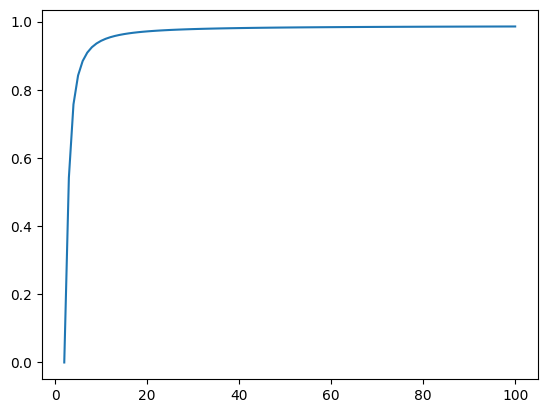

In [30]:
# Experiment elements
E0 = Jones_vector()
E0.linear_light(azimuth=0)
Pol = Jones_matrix()
Pol.diattenuator_perfect(azimuth=90*degrees)

# Loop in number of layers
N_layers = np.linspace(2, 100, 99, dtype=int)
I = np.zeros_like(N_layers, dtype=float)
for ind, N in enumerate(N_layers):
    # Create the liquid crystal
    Jlc = liquid_crystal_LM(ne=1.501, no=1.5, az_0=0, az_f=90*degrees, rotation=0, thickness=5e-4, wavelength=632.8e-9, Nlayers=N)
    # Calculate the output
    Ef = Pol * (Jlc * E0)
    # Calculate the intensity
    I[ind] = Ef.parameters.intensity()

# Plot the intensity
plt.plot(N_layers, I)
print("Intensity for max. layers: ", I[-1])


Usually 100 layers are more than enough. However, depending on the values of refractive indices, thickness and wavelength, some values may present erroneous transmission. For that reason we se the default value at 200, as we didd't find any erroneous value for such high nimber of layers.

### Voltages

Now we will introduce several voltages and will calculate the transmission as the molecules rotate. In order to simplify the model, we will consider that molecules rotation angle is proportional to applied voltage.

In [87]:
# Experiment elements
E0 = Jones_vector()
E0.linear_light(azimuth=0)
Pol = Jones_matrix()
Pol.diattenuator_perfect(azimuth=90*degrees)

# Loop in number of layers
rotation = np.linspace(0, 90*degrees, 91)
# Calculate the output
Jlc = liquid_crystal_LM(ne=1.501, no=1.5, az_0=0, az_f=90*degrees, rotation=np.zeros(1), thickness=5e-4, wavelength=632.8e-9, Nlayers=5)
# print(Jlc.M)
Ef = Pol * (Jlc * E0)
# Calculate the intensity
I = Ef.parameters.intensity()

# Plot the intensity
# plt.plot(rotation/degrees, I)
print(I)

J [[[ 3.10527518e-01+9.50564391e-01j  4.06495825e-01+8.49307446e-01j
    6.38183814e-01+6.04851558e-01j  8.69871804e-01+3.60395670e-01j
    9.65840111e-01+2.59138726e-01j]
  [ 0.00000000e+00+0.00000000e+00j -2.31687989e-01+2.44455888e-01j
   -3.27656297e-01+3.45712832e-01j -2.31687989e-01+2.44455888e-01j
   -4.01263235e-17+4.23376114e-17j]]

 [[ 0.00000000e+00+0.00000000e+00j -2.31687989e-01+2.44455888e-01j
   -3.27656297e-01+3.45712832e-01j -2.31687989e-01+2.44455888e-01j
   -4.01263235e-17+4.23376114e-17j]
  [ 9.65840111e-01+2.59138726e-01j  8.69871804e-01+3.60395670e-01j
    6.38183814e-01+6.04851558e-01j  4.06495825e-01+8.49307446e-01j
    3.10527518e-01+9.50564391e-01j]]]
J1 [[[ 3.10527518e-01+9.50564391e-01j  4.06495825e-01+8.49307446e-01j
    6.38183814e-01+6.04851558e-01j  8.69871804e-01+3.60395670e-01j
    9.65840111e-01+2.59138726e-01j]
  [ 0.00000000e+00+0.00000000e+00j -2.31687989e-01+2.44455888e-01j
   -3.27656297e-01+3.45712832e-01j -2.31687989e-01+2.44455888e-01j
   -4.0

Here we see that as rotation increases, the molecules retardance decreases and the intensity reaches a final value of 0 when there is no retardance.